In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive/')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive/


## Reading csv file

In [2]:
df_ocean = pd.read_csv("/content/drive/MyDrive/mllabpg/lab6/bottle.csv")
df_ocean2 = df_ocean.interpolate()
df_ocean2[0:5]

<ipython-input-2-1645c3eebe72>:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ocean = pd.read_csv("/content/drive/MyDrive/mllabpg/lab6/bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Description of data frame

In [3]:
description = df_ocean2.describe()
description

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,862703.000000,864863.000000,862703.000000,862703.000000,181096.000000,...,391866.000000,391866.000000,864863.000000,181096.000000,67890.000000,67657.000000,67890.000000,67657.000000,21465.000000,22114.000000
mean,17138.790958,432432.000000,226.831951,10.807838,33.831102,3.430995,25.778260,59.147264,152.530647,9.992377,...,0.941169,0.304325,228.395694,161.792781,2178.075973,2189.921605,2274.981435,2287.350718,7.944163,7.889076
std,10240.949817,249664.587269,316.050259,4.246283,0.467293,2.003024,1.166942,35.781259,86.785335,6.053452,...,2.094323,0.614476,319.456731,85.809540,98.963709,115.441051,31.906667,47.188668,0.010857,0.040623
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.690000,33.472000,1.560000,24.911000,25.700000,72.453038,5.000000,...,0.060000,0.040000,46.000000,200.000000,2093.393898,2080.325000,2247.883574,2244.337383,7.943200,7.873800
50%,16848.000000,432432.000000,125.000000,10.070000,33.841000,3.520000,25.927000,59.700000,159.735500,9.500000,...,0.170000,0.090909,126.000000,206.000000,2181.027927,2209.729918,2274.025166,2292.888738,7.943200,7.873800
75%,26557.000000,648647.500000,300.000000,13.900000,34.190000,5.426519,26.626000,96.275418,237.350800,15.000000,...,0.530000,0.260000,302.000000,212.500000,2281.178208,2311.047197,2305.960000,2309.570000,7.943200,7.920555
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [4]:
information = df_ocean2.info()
information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               864863 non-null  float64
 6   Salnty               864863 non-null  float64
 7   O2ml_L               862703 non-null  float64
 8   STheta               864863 non-null  float64
 9   O2Sat                862703 non-null  float64
 10  Oxy_µmol/Kg          862703 non-null  float64
 11  BtlNum               181096 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               864863 non-null  float64
 14  T_qual               864729 non-null  float64
 15  S_prec           

## Plot Data

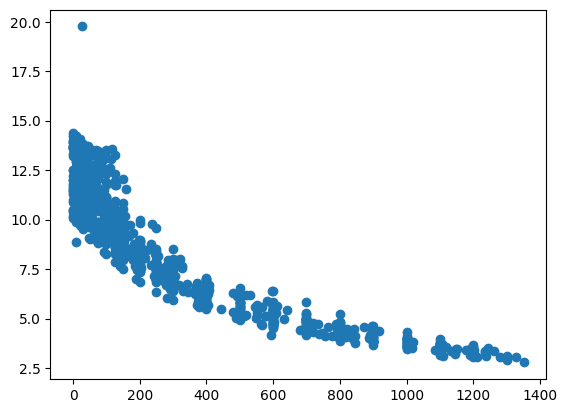

In [5]:
depth = df_ocean2.Depthm.values[0:1000]
temperature = df_ocean2["T_degC"].values[0:1000]
plt.scatter(depth, temperature)
plt.show()

## Convert Data

In [6]:
depth_vector = depth.reshape(-1,1)
# temperature_vector = temperature.reshape(-1,1)


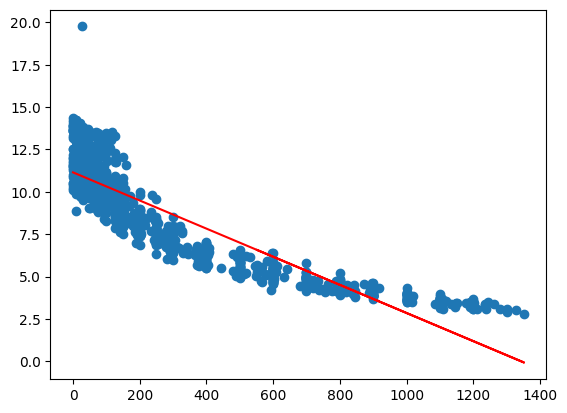

In [7]:
model = LinearRegression().fit(depth_vector, temperature)

prediction = model.predict(depth_vector)
plt.scatter(depth, temperature)
plt.plot(depth, prediction, color="red")
plt.show()

## Train the model

In [8]:
x_train, x_test, y_train, y_test = train_test_split(depth_vector, temperature, train_size=.8, test_size=.2)

print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_train shape {x_test.shape}")
print(f"y_train shape {y_test.shape}")



X_train shape (800, 1)
y_train shape (800,)
X_train shape (200, 1)
y_train shape (200,)


## Plot the training data

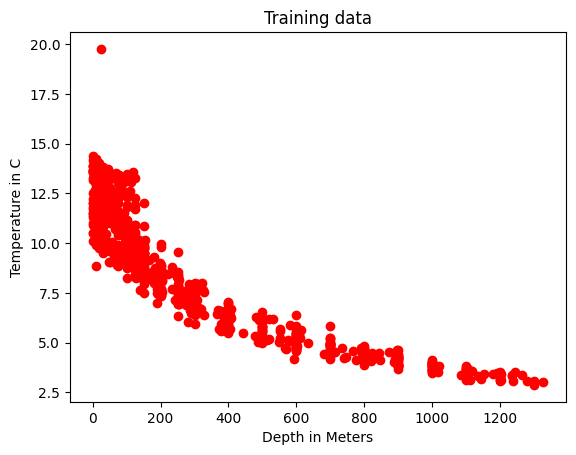

In [9]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Depth in Meters')
plt.ylabel('Temperature in C')
plt.title('Training data')
plt.show()

## Plot the testing data

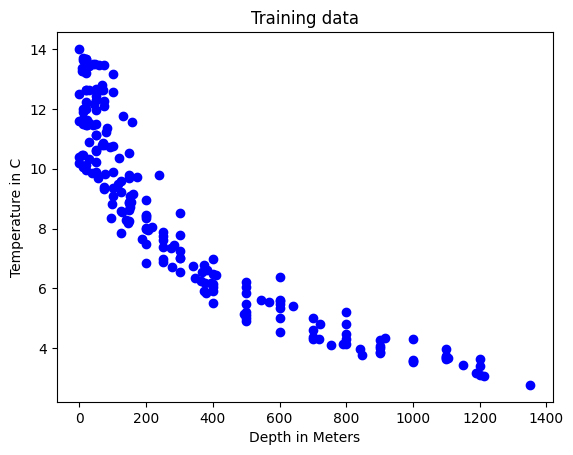

In [10]:
plt.scatter(x_test, y_test, color='blue')
plt.xlabel('Depth in Meters')
plt.ylabel('Temperature in C')
plt.title('Training data')
plt.show()

## Regression model score

In [11]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")

Train accuracy 79.18 %
